In [1]:
import sys
import numpy as np
from scipy.spatial.distance import cdist
from matplotlib import pyplot as plt

sys.path.insert(0, "..")
from src.utils import cdist_2d_v1, cdist_2d_v2

%matplotlib inline

In [2]:
n = 1000
m = 100
d = 32
a = np.random.uniform(size=(n, d))
b = np.random.uniform(size=(m, d))

### `scipy.spatial.distance.cdist` vs `v1` vs `v2`

In [3]:
%timeit cdist(a, b)

1.04 ms ± 4.61 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [4]:
%timeit cdist_2d_v1(a, b)

12.3 ms ± 94.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [5]:
%timeit cdist_2d_v2(a, b)

602 µs ± 128 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


### {`scipy.spatial.distance.cdist`, `v1`, `v2`} vs `d`

In [6]:
def plot_errorbar(stats):
    """
    stats[key] = mean, std
    """
    x = list(range(len(stats)))
    y = [v[0] for v in stats.values()]
    e = [v[1] for v in stats.values()]
    plt.errorbar(x, y, e, linestyle='None', marker='o')
    plt.xticks(x, stats.keys())
    plt.grid()

def test(cdist_fn):
    res = {}
    for d in range(1, 11):
        r = %timeit -o cdist_fn(a[:, :d], b[:, :d])
        res[d] = r.average * 1000, r.stdev * 1000
    plot_errorbar(res)

523 µs ± 2.55 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
528 µs ± 3.55 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
285 µs ± 3.78 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
274 µs ± 1.19 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
332 µs ± 2.64 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
338 µs ± 5.11 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
401 µs ± 6.17 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
398 µs ± 14.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
449 µs ± 5.45 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
439 µs ± 5.23 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


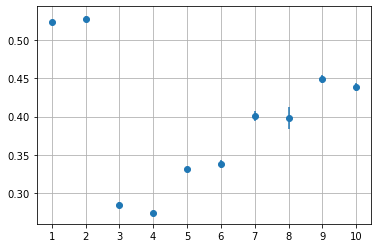

In [7]:
test(cdist)

189 µs ± 16.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
2.41 ms ± 19.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
2.7 ms ± 20.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
2.9 ms ± 31.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
3.15 ms ± 26.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
3.38 ms ± 30.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
3.57 ms ± 31.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
3.66 ms ± 55.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
3.89 ms ± 53.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
4.1 ms ± 44.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


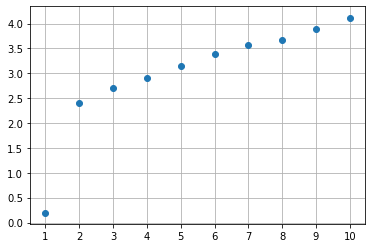

In [8]:
test(cdist_2d_v1)

286 µs ± 12.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
242 µs ± 12.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
517 µs ± 51 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
571 µs ± 56.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
512 µs ± 57.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
574 µs ± 88.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
606 µs ± 71.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
691 µs ± 108 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
571 µs ± 56 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
565 µs ± 29.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


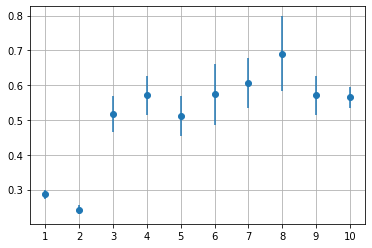

In [9]:
test(cdist_2d_v2)